Theo Filus Handy S - 0706022210051

In [9]:
#Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [10]:
#Load Dataset

df = pd.read_csv("https://raw.githubusercontent.com/tfilushandy/DATASET-DM-WEEK-6/refs/heads/main/adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [14]:
# Menampilkan jumlah unique values di kolom 'Work Class' termasuk NaN
workclassunik = df['workclass'].value_counts(dropna=False)
print (workclassunik.to_string())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10


In [15]:
# Menampilkan jumlah unique values di kolom 'occupation' termasuk NaN
occupationunik = df['occupation'].value_counts(dropna=False)
print (occupationunik.to_string())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15


In [16]:
# Ganti '?' dengan NaN untuk handle missing values
df.replace('?', pd.NA, inplace=True)

In [17]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,<NA>,103497,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
# Menghapus missing values (opsional, tergantung analisis)
df.dropna(inplace=True)

In [19]:
# Encoding data kategorikal
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Menyimpan encoder untuk dekoding jika diperlukan


In [20]:
# Memisahkan fitur dan target
X = df.drop('income', axis=1)  # Asumsi kolom 'income' adalah target
y = df['income']

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Visualisasi Distribusi Usia**

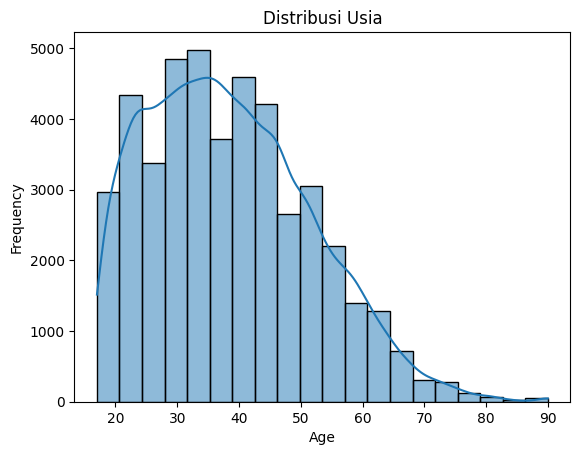

In [22]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box Plot Pendapatan Berdasarkan Jam **Kerja**

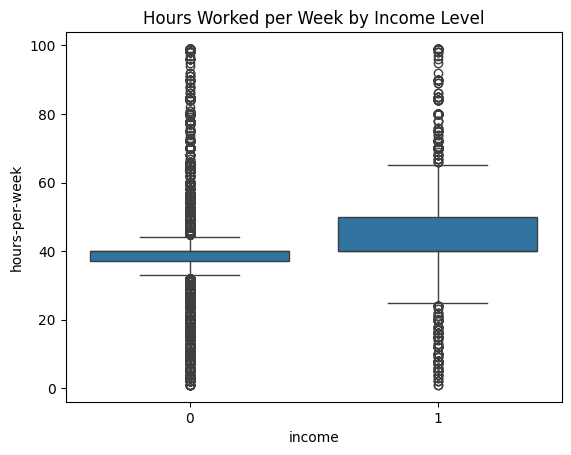

In [23]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Worked per Week by Income Level')
plt.show()


## **Korelasi Heatmap**

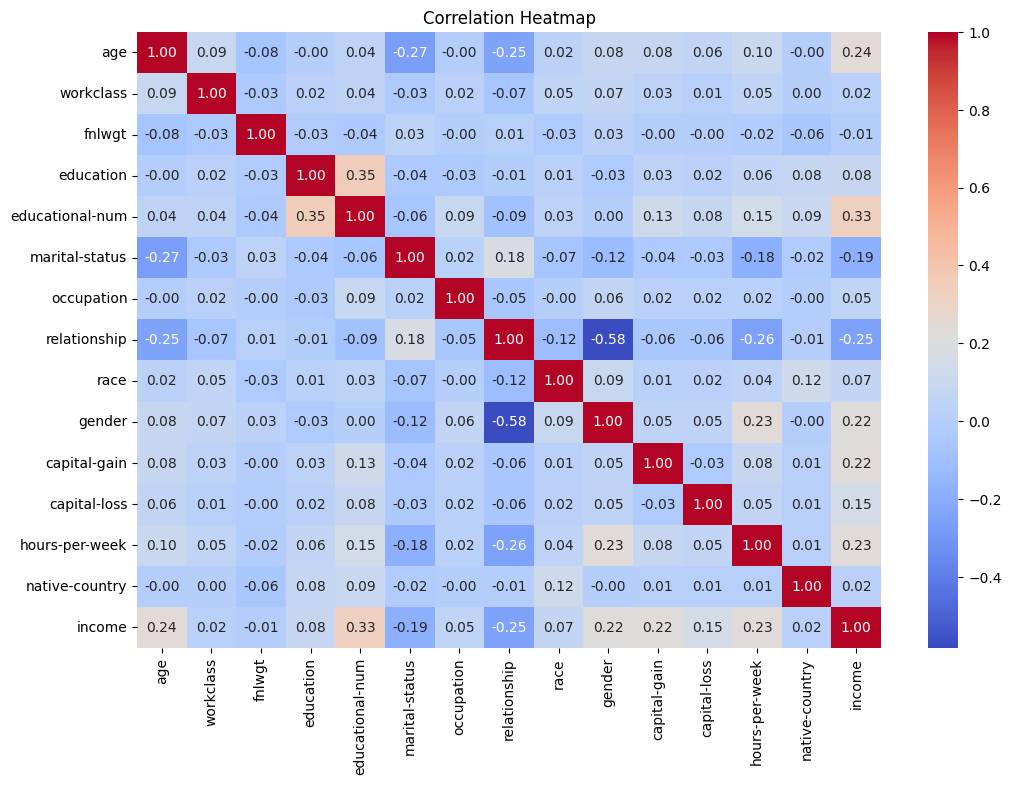

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10241
           1       0.60      0.62      0.61      3326

    accuracy                           0.81     13567
   macro avg       0.74      0.74      0.74     13567
weighted avg       0.81      0.81      0.81     13567



In [29]:
# Inisialisasi model Decision Tree dengan criterion 'entropy'
clf_entro = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_entro.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [30]:
# Prediksi pada data uji
y_pred_entro = clf_entro.predict(X_test)

In [31]:
# Menampilkan akurasi model
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_entro)))


Model accuracy score with criterion entropy: 0.8370


In [32]:
# Menampilkan akurasi pada data latih dan data uji
print("Training set score: {0:0.4f}".format(clf_entro.score(X_train, y_train)))
print("Test set score: {0:0.4f}".format(clf_entro.score(X_test, y_test)))

Training set score: 0.8343
Test set score: 0.8370


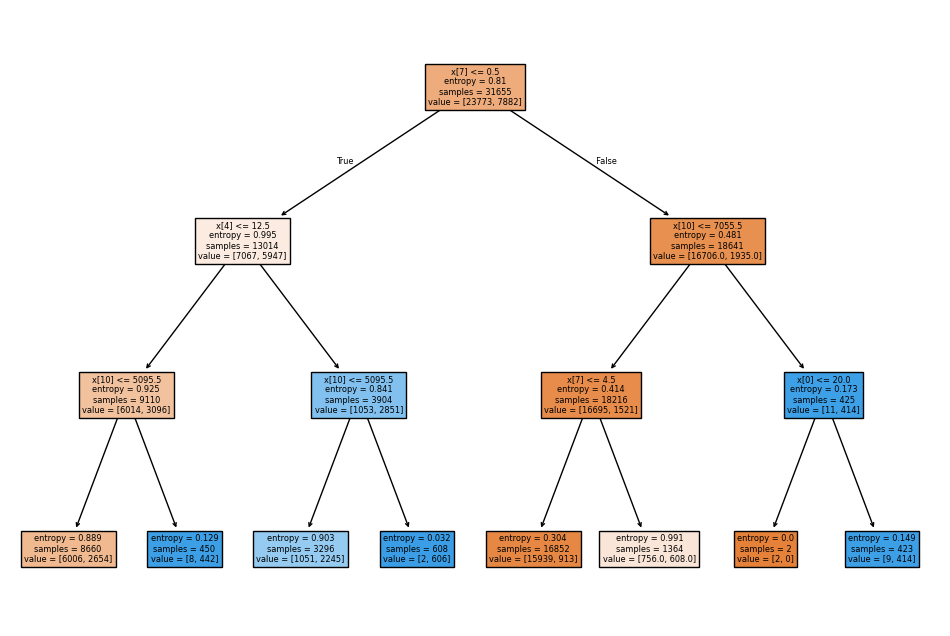

In [33]:
# Menampilkan struktur Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entro.fit(X_train, y_train), filled=True)
plt.show()

### **KNN**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     10241
           1       0.57      0.34      0.42      3326

    accuracy                           0.78     13567
   macro avg       0.69      0.63      0.64     13567
weighted avg       0.75      0.78      0.75     13567



# **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     10241
           1       0.68      0.38      0.49      3326

    accuracy                           0.80     13567
   macro avg       0.75      0.66      0.68     13567
weighted avg       0.79      0.80      0.78     13567



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Performansi**

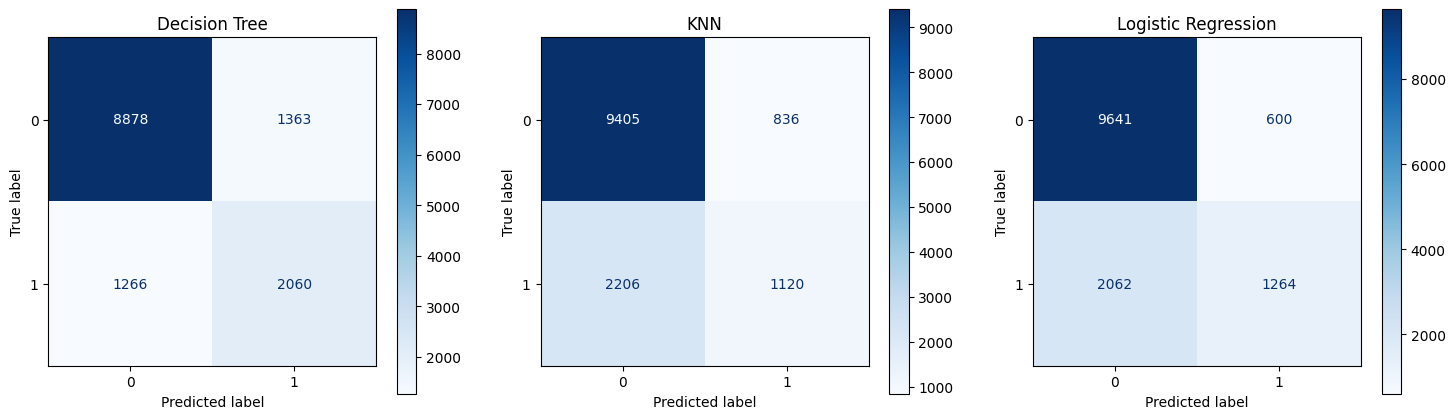

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("Decision Tree")

# KNN Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, ax=axes[1], cmap='Blues')
axes[1].set_title("KNN")

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, ax=axes[2], cmap='Blues')
axes[2].set_title("Logistic Regression")

plt.show()


Akurasi: Logistic Regression memiliki jumlah prediksi benar terbanyak untuk kelas 0 dan prediksi salah paling sedikit dibandingkan KNN dan Decision Tree.
Sensitivitas/Recall: Decision Tree memiliki nilai True Positive yang lebih tinggi (2060) dibandingkan KNN dan Logistic Regression, menunjukkan bahwa model ini lebih baik dalam mendeteksi kelas 1.
KNN: Memiliki jumlah True Negative yang tinggi (9405) tetapi performa untuk kelas 1 (True Positive) lebih rendah dibandingkan model lain.